In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import os

In [5]:
nd=pd.read_csv('EMDAT_1900-2021_NatDis.csv')

In [6]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))


In [7]:
def summary_table(df):

    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [8]:
def heatmap(df, index,columns,values,vmax,Title):
    DisasterDuration_wide = df.pivot(index=index, columns=columns, values=values)
    #DisasterDuration_wide = DisasterDuration_wide.sort_values(by = sort_by, ascending = False)#ignore_index = True)

    plt.figure(figsize=(12,8))

    ax = sns.heatmap(DisasterDuration_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()

In [9]:
def histplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x)
    plt.xticks(rotation=70,fontsize = 8)
    ax.set_xlabel(x_axis_title)
    ax.set_ylabel(y_axys_title)
    plt.title(plot_title, fontsize = 16,weight = 'bold')

In [10]:
def bar_plot(x,y,xlabel,ylabel,title, label):
    plt.figure(figsize=(20,5))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.barplot(x=x, y = y, palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=90,fontsize = 12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    
    if label == 'percent':
        for p in ax.patches:
                     ax.annotate("%.1f%%" % (100*float(p.get_height()/15827)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                         ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'vertical',
                         textcoords='offset points')
    if label == 'number':
        for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                 ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                 textcoords='offset points')

In [11]:
def Null_Analysis(df,title):
    null_columns=df.columns[df.isnull().any()]
    null_columns_plot = df[null_columns].isnull().sum().sort_values(ascending = False)
    bar_plot(null_columns_plot.index, null_columns_plot,"Features", "Number of Null Values", title, 'percent')

In [12]:
basic_EDA(nd)

Number of Samples: 15827,
Number of Features: 43,
Duplicated Entries: 0,
Null Entries: 285923,
Number of Rows with Null Entries: 15827 100.0%


In [13]:
summary_table(nd)

,Name,dtypes,Missing,Uniques
0,Dis No,object,0,15827
1,Year,int64,0,122
2,Seq,int64,0,1266
3,Disaster Group,object,0,1
4,Disaster Subgroup,object,0,6
5,Disaster Type,object,0,15
6,Disaster Subtype,object,2984,27
7,Disaster Subsubtype,object,14782,12
8,Event Name,object,12024,1532
9,Entry Criteria,object,335,13


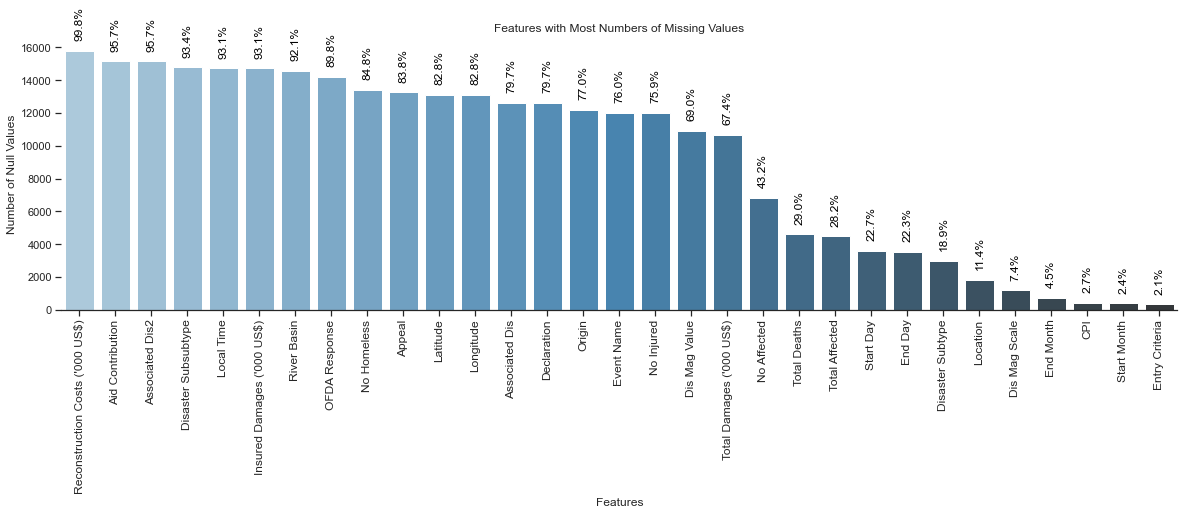

In [14]:
Null_Analysis(nd,'Features with Most Numbers of Missing Values')

In [15]:
info_subgroups = nd.loc[:,['Disaster Subgroup','Disaster Type','Disaster Subtype','Disaster Subsubtype']]
values={'Disaster Subtype': '-', 'Disaster Subsubtype': '-'}
info_subgroups = info_subgroups.fillna(value=values)

data_subgroups = pd.DataFrame(info_subgroups.groupby(['Disaster Subgroup','Disaster Type','Disaster Subtype','Disaster Subsubtype']).size().to_frame('Count'))
data_subgroups.iloc[:,:-1]

Empty DataFrame
Columns: []
Index: [(Biological, Animal accident, -, -), (Biological, Epidemic, -, -), (Biological, Epidemic, Bacterial disease, -), (Biological, Epidemic, Parasitic disease, -), (Biological, Epidemic, Viral disease, -), (Biological, Insect infestation, -, -), (Biological, Insect infestation, Grasshopper, -), (Biological, Insect infestation, Locust, -), (Climatological, Drought, -, -), (Climatological, Drought, Drought, -), (Climatological, Glacial lake outburst, -, -), (Climatological, Wildfire, -, -), (Climatological, Wildfire, Forest fire, -), (Climatological, Wildfire, Land fire (Brush, Bush, Pasture), -), (Extra-terrestrial, Impact, -, -), (Geophysical, Earthquake, -, -), (Geophysical, Earthquake, Ground movement, -), (Geophysical, Earthquake, Tsunami, -), (Geophysical, Mass movement (dry), -, -), (Geophysical, Mass movement (dry), Avalanche, -), (Geophysical, Mass movement (dry), Landslide, -), (Geophysical, Mass movement (dry), Landslide, Mudslide), (Geophysical, Mass movement (dry), Rockfall, -), (Geophysical, Mass movement (dry), Subsidence, Sudden subsidence), (Geophysical, Volcanic activity, -, -), (Geophysical, Volcanic activity, Ash fall, -), (Geophysical, Volcanic activity, Lava flow, -), (Geophysical, Volcanic activity, Pyroclastic flow, -), (Hydrological, Flood, -, -), (Hydrological, Flood, Coastal flood, -), (Hydrological, Flood, Flash flood, -), (Hydrological, Flood, Riverine flood, -), (Hydrological, Landslide, -, -), (Hydrological, Landslide, Avalanche, -), (Hydrological, Landslide, Avalanche, Winter storm/Blizzard), (Hydrological, Landslide, Landslide, -), (Hydrological, Landslide, Mudslide, -), (Hydrological, Landslide, Rockfall, -), (Hydrological, Landslide, Subsidence, Sudden subsidence), (Meteorological, Extreme temperature, Cold wave, -), (Meteorological, Extreme temperature, Heat wave, -), (Meteorological, Extreme temperature, Severe winter conditions, -), (Meteorological, Extreme temperature, Severe winter conditions, Snow/Ice), (Meteorological, Fog, -, -), (Meteorological, Storm, -, -), (Meteorological, Storm, Convective storm, -), (Meteorological, Storm, Convective storm, Derecho), (Meteorological, Storm, Convective storm, Hail), (Meteorological, Storm, Convective storm, Lightning/Thunderstorms), (Meteorological, Storm, Convective storm, Rain), (Meteorological, Storm, Convective storm, Sand/Dust storm), (Meteorological, Storm, Convective storm, Severe storm), (Meteorological, Storm, Convective storm, Storm/Surge), (Meteorological, Storm, Convective storm, Tornado), (Meteorological, Storm, Convective storm, Winter storm/Blizzard), (Meteorological, Storm, Extra-tropical storm, -), (Meteorological, Storm, Tropical cyclone, -)]

In [16]:
nd_general = nd.loc[:,['Year','Disaster Subgroup','Disaster Type','Total Deaths','Total Affected']]
nd_general = nd_general[nd_general['Disaster Subgroup'] != 'Extra-terrestrial']

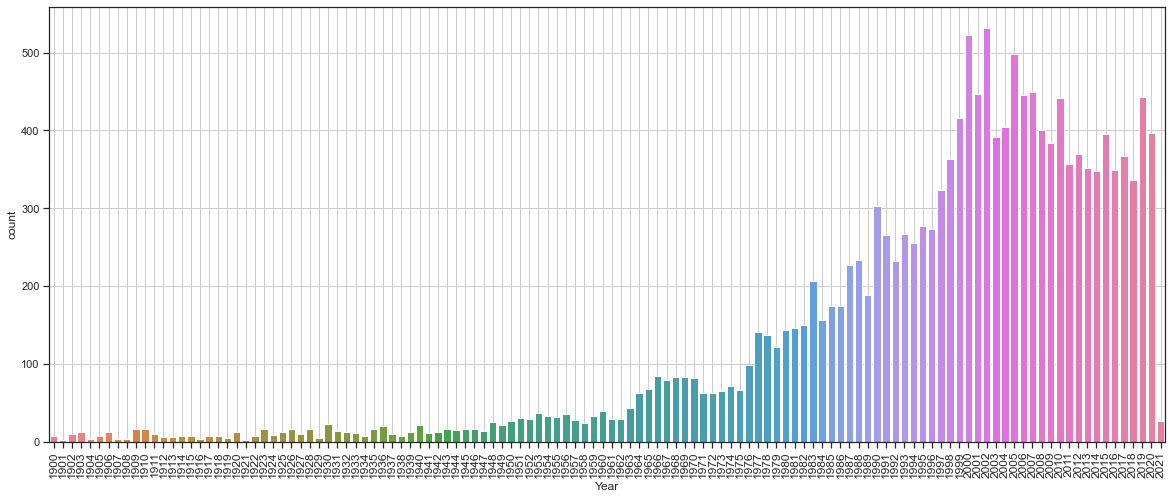

In [17]:
#plot number of disasters recorded by year
plt.figure(figsize=(20,8))
ax = sns.countplot(data = nd_general,x='Year', palette = 'husl')
plt.xticks(rotation=90,fontsize = 12)
ax.grid()